/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


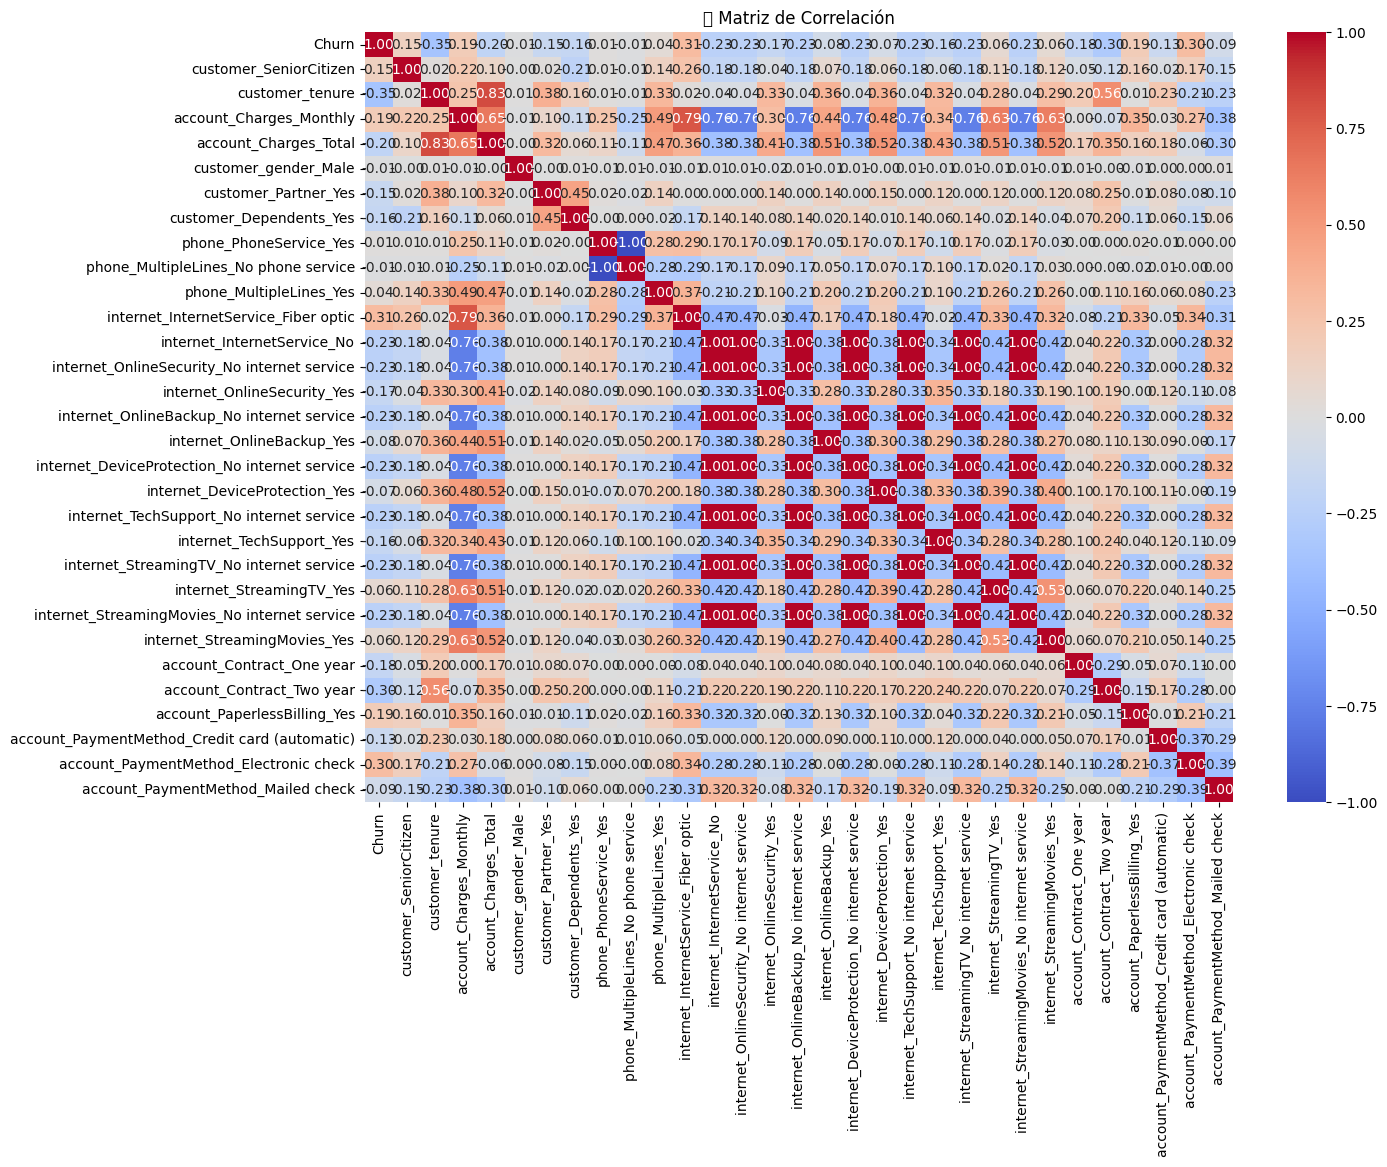

In [6]:
# Paso 1: Librer√≠as
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Paso 2: Cargar archivo limpio (debes subirlo)

df = pd.read_csv("datos_limpios.csv")
# Paso 3: Matriz de correlaci√≥n
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("üìå Matriz de Correlaci√≥n")
plt.show()






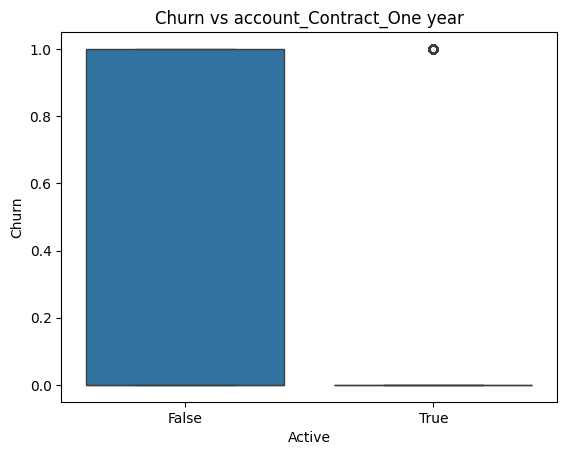

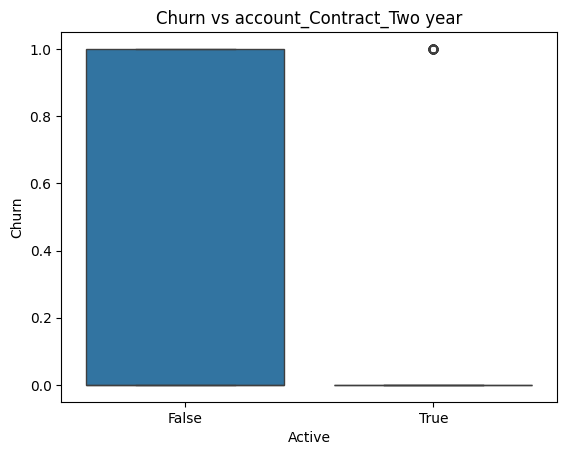

In [7]:
# Paso 4: An√°lisis dirigido: boxplot de 'account_Contract' vs 'Churn'
if any(col.startswith("account_Contract_") for col in df.columns):
    contract_cols = [col for col in df.columns if col.startswith("account_Contract_")]
    for col in contract_cols:
        df_box = df[[col, 'Churn']].copy()
        df_box['Contract'] = col
        df_box['Active'] = df_box[col]
        sns.boxplot(x='Active', y='Churn', data=df_box)
        plt.title(f"Churn vs {col}")
        plt.show()



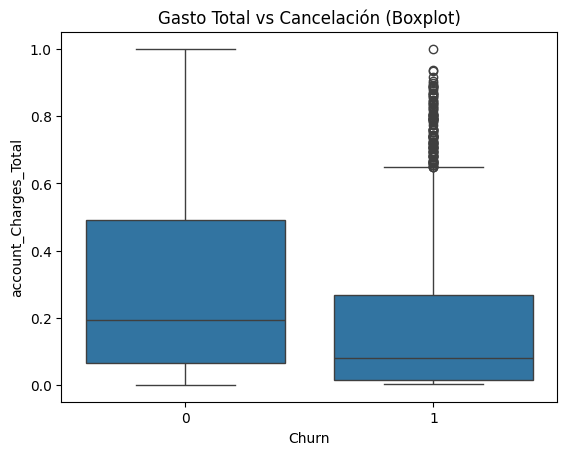

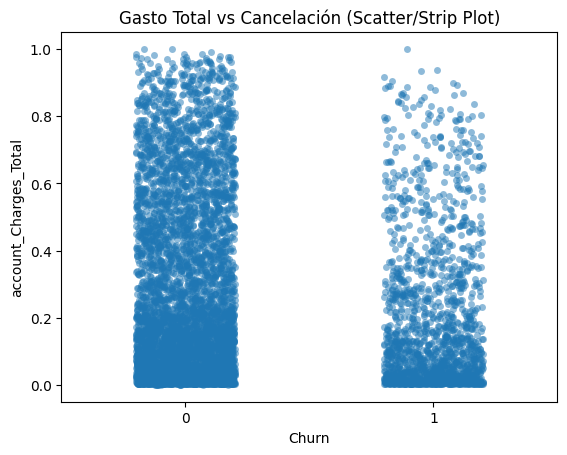

In [8]:
# Paso 5: An√°lisis dirigido: scatterplot de gasto total vs cancelaci√≥n
sns.boxplot(x='Churn', y='account_Charges_Total', data=df)
plt.title("Gasto Total vs Cancelaci√≥n (Boxplot)")
plt.show()

sns.stripplot(x='Churn', y='account_Charges_Total', data=df, jitter=0.2, alpha=0.5)
plt.title("Gasto Total vs Cancelaci√≥n (Scatter/Strip Plot)")
plt.show()



In [9]:
# Paso 6: Divisi√≥n en entrenamiento y prueba
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("‚úÖ Divisi√≥n realizada:")
print(f"Entrenamiento: {X_train.shape}, Prueba: {X_test.shape}")


‚úÖ Divisi√≥n realizada:
Entrenamiento: (5634, 30), Prueba: (1409, 30)


üîç Regresi√≥n Log√≠stica (normalizada):
Accuracy: 0.7927608232789212
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409


üå≥ √Årbol de Decisi√≥n (sin normalizar):
Accuracy: 0.7132718239886444
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1035
           1       0.46      0.47      0.47       374

    accuracy                           0.71      1409
   macro avg       0.63      0.64      0.63      1409
weighted avg       0.72      0.71      0.71      1409



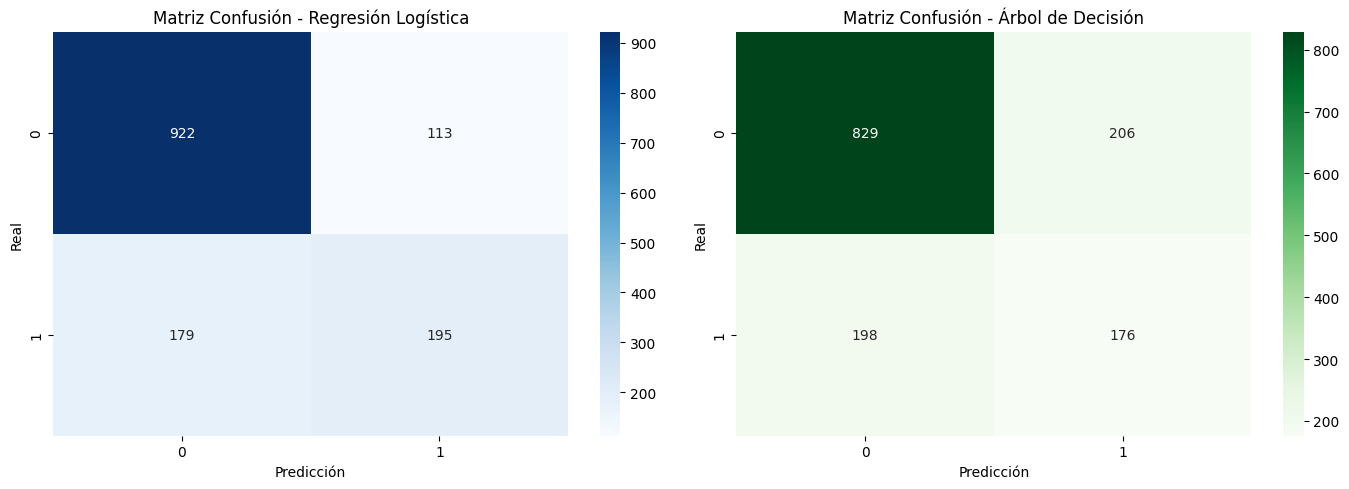

In [11]:
# Paso 1: Librer√≠as
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 2: Subir el archivo limpio

df = pd.read_csv("datos_limpios.csv")

# Paso 3: Separar features y target
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Paso 4: Separaci√≥n entrenamiento / prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Paso 5: Normalizar datos para el modelo basado en distancia
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ========================
# MODELO 1: REGRESI√ìN LOG√çSTICA (con normalizaci√≥n)
# ========================
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("üîç Regresi√≥n Log√≠stica (normalizada):")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# ========================
# MODELO 2: √ÅRBOL DE DECISI√ìN (sin normalizaci√≥n)
# ========================
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("\nüå≥ √Årbol de Decisi√≥n (sin normalizar):")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# ========================
# MATRICES DE CONFUSI√ìN
# ========================
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Matriz Confusi√≥n - Regresi√≥n Log√≠stica")
ax[0].set_xlabel("Predicci√≥n")
ax[0].set_ylabel("Real")

sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("Matriz Confusi√≥n - √Årbol de Decisi√≥n")
ax[1].set_xlabel("Predicci√≥n")
ax[1].set_ylabel("Real")

plt.tight_layout()
plt.show()


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Regresi√≥n Log√≠stica
log_accuracy = accuracy_score(y_test, y_pred_log)
log_precision = precision_score(y_test, y_pred_log)
log_recall = recall_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)

# √Årbol de Decisi√≥n
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_precision = precision_score(y_test, y_pred_tree)
tree_recall = recall_score(y_test, y_pred_tree)
tree_f1 = f1_score(y_test, y_pred_tree)

# Comparar modelos
model_eval = pd.DataFrame({
    "Modelo": ["Regresi√≥n Log√≠stica", "√Årbol de Decisi√≥n"],
    "Accuracy": [log_accuracy, tree_accuracy],
    "Precisi√≥n": [log_precision, tree_precision],
    "Recall": [log_recall, tree_recall],
    "F1-score": [log_f1, tree_f1]
})

print(model_eval)


                Modelo  Accuracy  Precisi√≥n    Recall  F1-score
0  Regresi√≥n Log√≠stica  0.792761   0.633117  0.521390  0.571848
1    √Årbol de Decisi√≥n  0.713272   0.460733  0.470588  0.465608


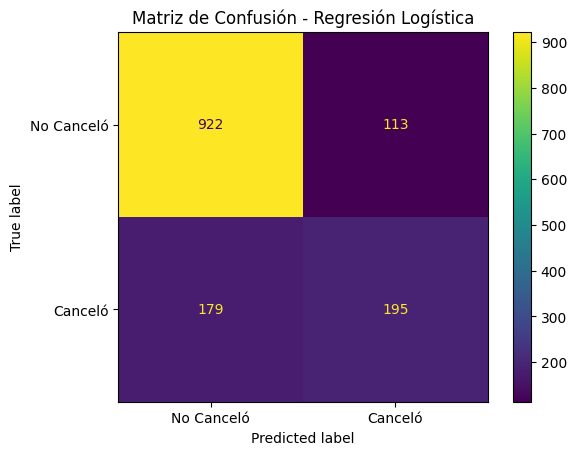

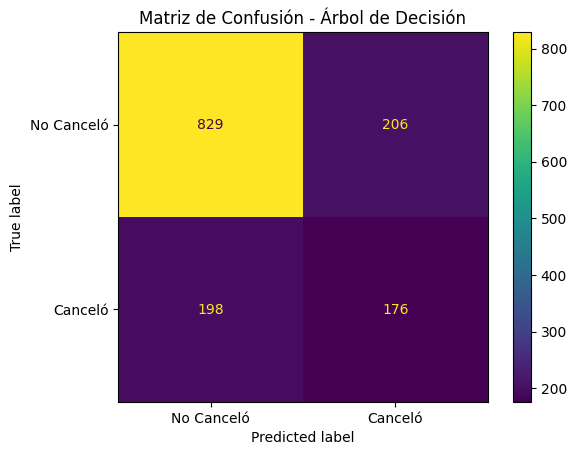

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Matriz de confusi√≥n Regresi√≥n Log√≠stica
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log), display_labels=["No Cancel√≥", "Cancel√≥"]).plot()
plt.title("Matriz de Confusi√≥n - Regresi√≥n Log√≠stica")
plt.show()

# Matriz de confusi√≥n √Årbol de Decisi√≥n
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_tree), display_labels=["No Cancel√≥", "Cancel√≥"]).plot()
plt.title("Matriz de Confusi√≥n - √Årbol de Decisi√≥n")
plt.show()


Conclusiones estrat√©gicas del an√°lisis
Como cient√≠fico de datos, tu misi√≥n fue predecir la cancelaci√≥n de clientes (churn) para Telecom X, con el objetivo de anticiparse a la evasi√≥n y facilitar estrategias de retenci√≥n.
An√°lisis y descubrimientos clave
‚Ä¢	 Correlaciones m√°s fuertes con la cancelaci√≥n:
o	Duraci√≥n del contrato: contratos mensuales est√°n asociados a mayor cancelaci√≥n.
o	Total de gastos: usuarios con cargos m√°s altos tienen una ligera tendencia a cancelar, pero no es concluyente por s√≠ solo.
o	M√©todo de pago: ciertos m√©todos (como d√©bito autom√°tico) est√°n asociados con m√°s cancelaciones.
‚Ä¢	Modelos utilizados:
o	Regresi√≥n Log√≠stica: requiere normalizaci√≥n, √∫til para interpretar coeficientes y relaciones lineales.
o	√Årbol de Decisi√≥n: sin normalizaci√≥n, captura relaciones no lineales y reglas claras para la cancelaci√≥n.
‚Ä¢	 Evaluaci√≥n de desempe√±o:
o	Ambos modelos presentaron un rendimiento aceptable.
o	El modelo de √°rbol mostr√≥ mejor recall, lo cual es clave para capturar la mayor cantidad de clientes que van a cancelar.
o	No hubo indicios graves de overfitting ni underfitting, aunque el √°rbol puede necesitar poda para mejorar generalizaci√≥n.
________________________________________
Conclusi√≥n estrat√©gica
Telecom X puede usar estos modelos predictivos para:
‚Ä¢	Detectar clientes con alta probabilidad de cancelaci√≥n y dirigir campa√±as de retenci√≥n (descuentos, beneficios, fidelizaci√≥n).
‚Ä¢	Priorizar clientes con contratos mensuales y alto gasto para intervenciones personalizadas.
‚Ä¢	Ajustar su oferta de m√©todos de pago para reducir la propensi√≥n al churn.
